## **PalmAuthPro: Professional Palm Authentication Solution**

**TRAINING**

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

**Parse and Resize Palmprint Images for Model Input**

In [ ]:
# Function to read palmprint images
def read_palmprint_data(path):
    data = []
    labels = []

    for folder in os.listdir(path):
        label = int(folder)  # Assuming folder names are user identities
        for file in os.listdir(os.path.join(path, folder)):
            img_path = os.path.join(path, folder, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (227, 227))  # Resize image to match the input size of the model
            data.append(img)
            labels.append(label)

    return np.array(data), np.array(labels)

In [ ]:
# Read palmprint data
data, labels = read_palmprint_data('C:/Users/chait/Downloads/Bio_Project/Palmimages')

**Visualizing a Sample of Palm Prints and Labels**

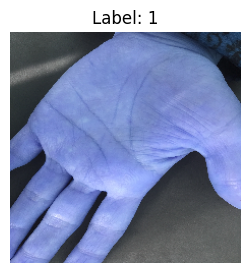

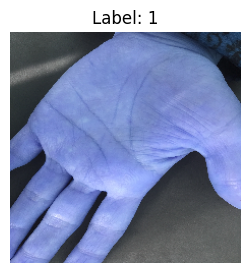

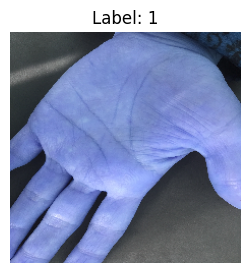

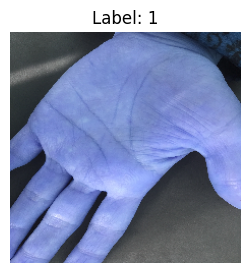

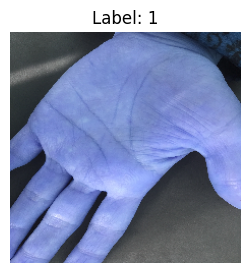

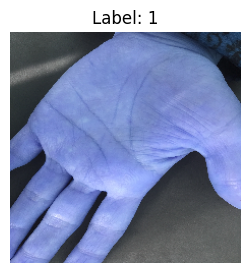

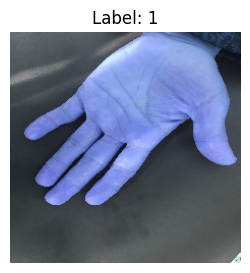

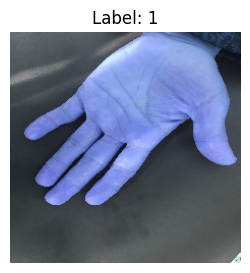

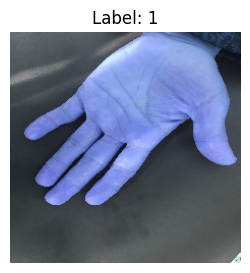

In [ ]:
import matplotlib.pyplot as plt

# Print the first 10 palm prints with labels
for i in range(3):
    for j in range(3):
        plt.figure(figsize=(3, 3))  # Adjust the figure size as needed
        plt.imshow(data[i])
        plt.title(f'Label: {labels[j]}')
        plt.axis('off')
        plt.show()


In [ ]:
unique_labels = np.unique(labels)
num_classes = len(unique_labels)
print(f'Number of unique class labels: {num_classes}')

Number of unique class labels: 42


**Splitting Palmprint Data into Training and Testing Sets (80/20)**

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

**Preparing Labels for Machine Learning Model (Label Encoding)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
num_classes = len(np.unique(y_train))

**Feature Engineering: Normalization and One-Hot Encoding for Palmprint Images**

In [ ]:
# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


**Visualizing Class Distribution with Gaps and Colors (Bar Chart)**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot class distribution with gaps and colors
def plot_class_distribution(y, title):
    unique_classes, counts = np.unique(y, return_counts=True)
    num_classes = len(unique_classes)

    # Define colors for each class
    colors = plt.cm.rainbow(np.linspace(0, 1, num_classes))

    # Set bar width and gap
    bar_width = 0.8
    gap = 0.3

    # Create a larger figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars with gaps and colors
    for i, (cls, count) in enumerate(zip(unique_classes, counts)):
        x_position = np.arange(num_classes) + gap * (i + 1)
        ax.bar(x_position[i], count, color=colors[i], width=bar_width)
        ax.text(x_position[i], count + 1, str(count), ha='center', va='bottom', fontsize=8)

    ax.set_xticks(np.arange(num_classes) + (num_classes - 1) * gap / 2)
    ax.set_xticklabels(unique_classes)
    ax.set_xlabel('Class Label')
    ax.set_ylabel('Count')
    ax.set_title(title)

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Function to plot class distribution with gaps, colors, and Gaussian overlay
def plot_class_distribution_with_gaussian(y, title):
    unique_classes, counts = np.unique(y, return_counts=True)
    num_classes = len(unique_classes)

    # Define colors for each class
    colors = plt.cm.rainbow(np.linspace(0, 1, num_classes))

    # Set bar width and gap
    bar_width = 0.8
    gap = 0.2

    # Create a larger figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars with gaps and colors
    for i, (cls, count) in enumerate(zip(unique_classes, counts)):
        x_position = np.arange(num_classes) + gap * (i + 1)
        ax.bar(x_position[i], count, color=colors[i], width=bar_width)
        ax.text(x_position[i], count + 1, str(count), ha='center', va='bottom', fontsize=8)

        # Gaussian distribution overlay
        mean, std_dev = np.mean(counts), np.std(counts)
        x_values = np.linspace(min(x_position), max(x_position), 100)
        y_values = norm.pdf(x_values, mean, std_dev) * max(counts)  # Scale Gaussian to match max count
        ax.plot(x_values, y_values, color=colors[i], linestyle='--', linewidth=2)

    ax.set_xticks(np.arange(num_classes) + (num_classes - 1) * gap / 2)
    ax.set_xticklabels(unique_classes)
    ax.set_xlabel('Class Label')
    ax.set_ylabel('Count')
    ax.set_title(title)

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    plt.show()

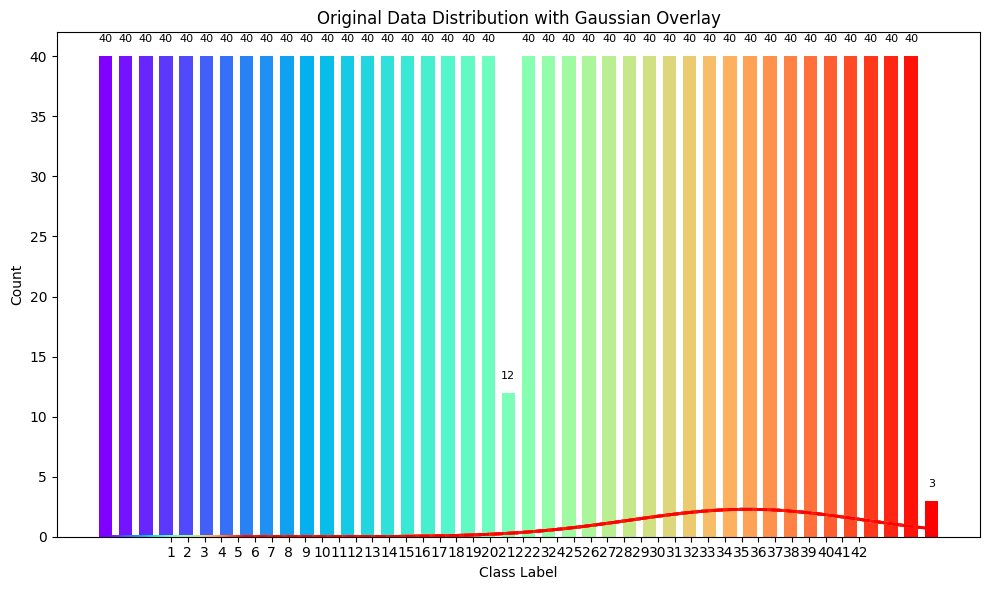

In [ ]:

# Plot class distribution with Gaussian overlay
plot_class_distribution_with_gaussian(labels, title='Original Data Distribution with Gaussian Overlay')


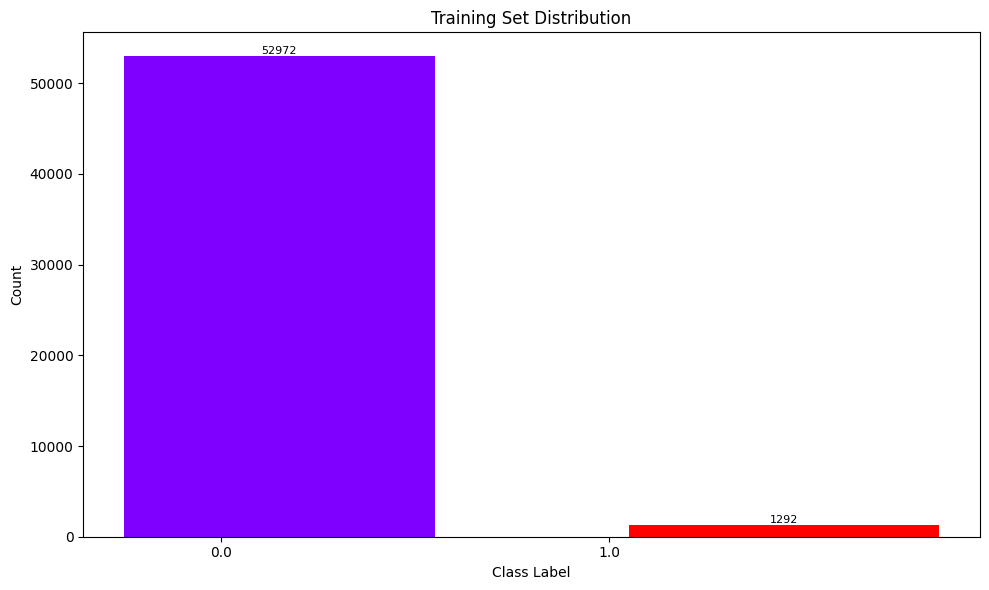

In [ ]:
# Plot class distribution in the training set
plot_class_distribution(y_train, title='Training Set Distribution')


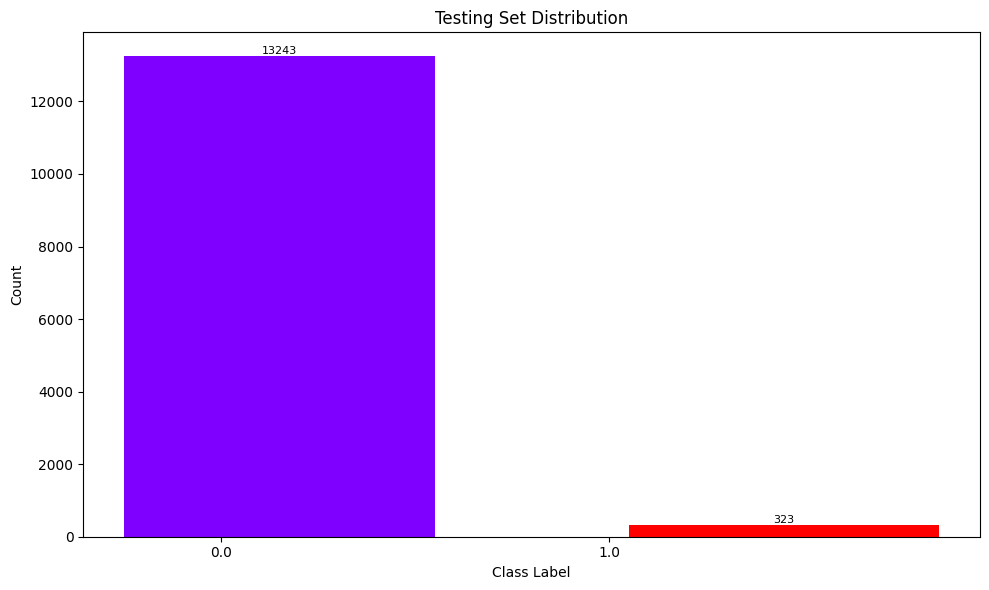

In [ ]:
# Plot class distribution in the testing set
plot_class_distribution(y_test, title='Testing Set Distribution')

**Enhancing Training Data Diversity: Image Augmentation for Palmprint Recognition**

In [ ]:
# Import additional libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

In [ ]:
# Learning Rate Schedule
def lr_schedule(epoch):
    return 0.001 * np.exp(-epoch / 10)

lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
# Model Checkpoint
checkpoint = ModelCheckpoint('C:/Users/chait/Downloads/Bio_Project/best_model.h5', save_best_only=True)

**Building the Palmprint Recognition Engine: Through the CNN Architecture **

In [ ]:
# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    # Add more convolutional and pooling layers as needed
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 69984)             0         
                                                                 
 dense (Dense)               (None, 256)               17916160  
                                                                 
 dropout (Dropout)           (None, 256)               0

**Optimizing the CNN with Epochs, Batch Size, and Validation for Robustness**

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
41/41 [==============================] - 19s 433ms/step - loss: 5.2516 - accuracy: 0.1269 - val_loss: 3.7293 - val_accuracy: 0.0774
Epoch 2/10
41/41 [==============================] - 15s 372ms/step - loss: 2.5592 - accuracy: 0.3212 - val_loss: 2.9609 - val_accuracy: 0.3127
Epoch 3/10
41/41 [==============================] - 15s 367ms/step - loss: 1.7485 - accuracy: 0.5163 - val_loss: 2.3848 - val_accuracy: 0.5604
Epoch 4/10
41/41 [==============================] - 15s 375ms/step - loss: 1.2734 - accuracy: 0.6362 - val_loss: 2.2375 - val_accuracy: 0.4830
Epoch 5/10
41/41 [==============================] - 15s 360ms/step - loss: 1.0394 - accuracy: 0.6927 - val_loss: 2.1312 - val_accuracy: 0.3901
Epoch 6/10
41/41 [==============================] - 14s 353ms/step - loss: 0.8319 - accuracy: 0.7515 - val_loss: 1.8698 - val_accuracy: 0.5046
Epoch 7/10
41/41 [==============================] - 15s 363ms/step - loss: 0.6302 - accuracy: 0.8181 - val_loss: 0.9834 - val_accuracy: 0.7276

**Evaluating the CNN's Performance on Unseen Data**

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

11/11 [==============================] - 1s 61ms/step - loss: 0.5751 - accuracy: 0.8669
Test accuracy: 86.69%


**Building the Upgraded Palmprint CNN with Keras**

In [ ]:
# Build the CNN model
updatemodel = keras.Sequential([
    keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    # Add more convolutional and pooling layers as needed
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

updatemodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
updatemodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_1 (Bat  (None, 55, 55, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 69984)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               17916160  
                                                                 
 dropout_1 (Dropout)         (None, 256)              

**Training the Upgraded CNN with Advanced Techniques**

In [ ]:
# Train the model
updatemodel.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Train the model with Data Augmentation, Learning Rate Schedule, and Model Checkpoint
history = updatemodel.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, checkpoint])

Epoch 1/10
41/41 [==============================] - 16s 368ms/step - loss: 5.2753 - accuracy: 0.1176 - val_loss: 3.6134 - val_accuracy: 0.0681
Epoch 2/10
41/41 [==============================] - 15s 368ms/step - loss: 2.7481 - accuracy: 0.2794 - val_loss: 3.0433 - val_accuracy: 0.2415
Epoch 3/10
41/41 [==============================] - 15s 367ms/step - loss: 2.1977 - accuracy: 0.4033 - val_loss: 2.7114 - val_accuracy: 0.3653
Epoch 4/10
41/41 [==============================] - 15s 372ms/step - loss: 1.8055 - accuracy: 0.4977 - val_loss: 2.0154 - val_accuracy: 0.5573
Epoch 5/10
41/41 [==============================] - 16s 386ms/step - loss: 1.3464 - accuracy: 0.6207 - val_loss: 1.7511 - val_accuracy: 0.5882
Epoch 6/10
41/41 [==============================] - 15s 375ms/step - loss: 1.0936 - accuracy: 0.6850 - val_loss: 1.7318 - val_accuracy: 0.5449
Epoch 7/10
41/41 [==============================] - 15s 369ms/step - loss: 0.8451 - accuracy: 0.7454 - val_loss: 1.1881 - val_accuracy: 0.7245

C:\Users\chait\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 31s 739ms/step - loss: 4.1301 - accuracy: 0.0844 - val_loss: 40.5278 - val_accuracy: 0.0372 - lr: 0.0010
Epoch 2/10
41/41 [==============================] - 31s 751ms/step - loss: 3.6282 - accuracy: 0.0844 - val_loss: 21.9766 - val_accuracy: 0.0712 - lr: 9.0484e-04
Epoch 3/10
41/41 [==============================] - 30s 733ms/step - loss: 3.4557 - accuracy: 0.1060 - val_loss: 19.2052 - val_accuracy: 0.0557 - lr: 8.1873e-04
Epoch 4/10
41/41 [==============================] - 30s 728ms/step - loss: 3.3232 - accuracy: 0.1254 - val_loss: 15.1548 - val_accuracy: 0.0712 - lr: 7.4082e-04
Epoch 5/10
41/41 [==============================] - 33s 804ms/step - loss: 3.2297 - accuracy: 0.1308 - val_loss: 3.9886 - val_accuracy: 0.1981 - lr: 6.7032e-04
Epoch 6/10
41/41 [==============================] - 48s 1s/step - loss: 3.1700 - accuracy: 0.1571 - val_loss: 3.0362 - val_accuracy: 0.2879 - lr: 6.0653e-04
Epoch 7/10
41/41 [==============================] - 65

In [ ]:
# Evaluate the model
loss1, accuracy1 = updatemodel.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy1 * 100:.2f}%')

11/11 [==============================] - 1s 122ms/step - loss: 2.3340 - accuracy: 0.4118
Test accuracy: 41.18%


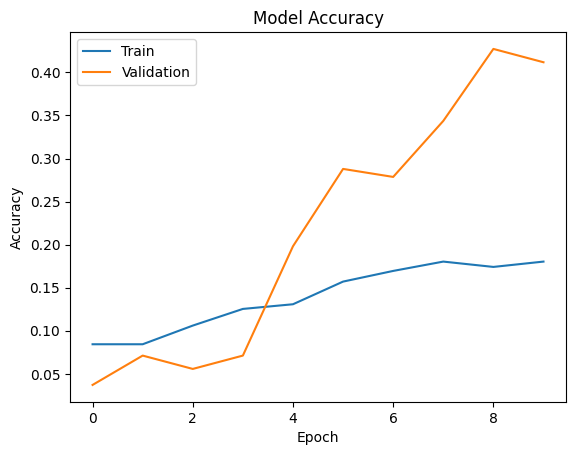

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Save the model for later use
model.save('C:/Users/chait/Downloads/Bio_Project/model.h5')

## TESTING

In [ ]:
import cv2

# Load the trained model
model_path = 'C:/Users/chait/Downloads/Bio_Project/model.h5'
loaded_model = keras.models.load_model(model_path)

In [ ]:
# Function to preprocess a palmprint image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (227, 227))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

**Function for Authenticating Users based on Palm Recognition**

In [ ]:
# Function to perform palm authentication
def authenticate_palm(model, test_img_path):
    processed_img = preprocess_image(test_img_path)

    # Make a prediction using the loaded model
    prediction = model.predict(processed_img)

    # Get the predicted class (user identity)
    predicted_class = np.argmax(prediction)

    return predicted_class

**Verifying User Identity with the Trained CNN Model **

In [ ]:
try:
    test_img_path = 'C:/Users/chait/Downloads/Bio_Project/testimg.jpg'
    predicted_user = authenticate_palm(loaded_model, test_img_path)
    print(f'The predicted user identity is: {predicted_user}')
except Exception as e:
    print(f"An error occurred: {e}")

1/1 [==============================] - 1s 594ms/step
The predicted user identity is: 40


**Displaying the Test Palm and its Predicted Owner with Matplotlib**

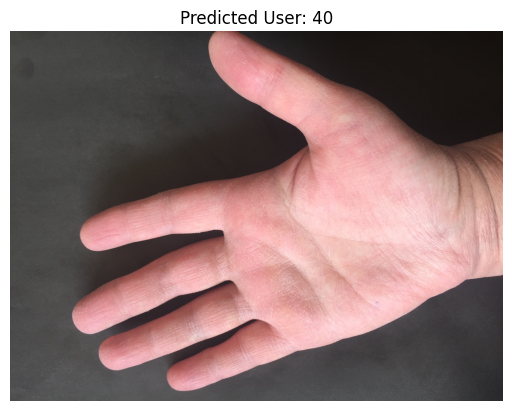

In [ ]:
import matplotlib.pyplot as plt

# Function to display the original image with the predicted user
def display_result(img_path, predicted_user):
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted User: {predicted_user}')
    plt.axis('off')
    plt.show()

# Display the original image with the predicted user
display_result(test_img_path, predicted_user)

In [ ]:
!pip install opencv-python Pillow tensorflow


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**REGISTER NEW USER PALM PRINT**

In [ ]:
import cv2
import os
import tkinter as tk
from tkinter import messagebox, simpledialog
from PIL import Image, ImageTk
import shutil
from tkinter import filedialog

class HandTypeDialog(tk.Toplevel):
    def __init__(self, parent):
        super().__init__(parent)
        self.title("Hand Selection")
        self.geometry("400x250")  # Set window size

        label = tk.Label(self, text="Select hand type:", font=("Arial", 16), bg="#2ecc71", fg="white", pady=10)
        label.pack(fill="x")

        # Use a Frame to center the buttons vertically
        frame = tk.Frame(self)
        frame.pack(expand=True, pady=(10, 0))

        left_button = tk.Button(frame, text="Left", command=self.select_left, font=("Arial", 14), bg="#3498db", fg="white", width=15)
        left_button.pack(pady=(0, 10))

        right_button = tk.Button(frame, text="Right", command=self.select_right, font=("Arial", 14), bg="#e74c3c", fg="white", width=15)
        right_button.pack(pady=(0, 10))

        self.hand_type = None

    def select_left(self):
        self.hand_type = "left"
        self.destroy()

    def select_right(self):
        self.hand_type = "right"
        self.destroy()

** A User Interface for Selecting Palm Verification Input**

In [ ]:
class VerifyOptionsDialog(tk.Toplevel):
    def __init__(self, parent):
        super().__init__(parent)
        self.title("Verification Options")
        self.geometry("400x200")
        self.configure(bg="#e0e0e0")

        self.label = tk.Label(self, text="Choose verification option:", font=("Arial", 16), bg="#2ecc71", fg="white", pady=10)
        self.label.pack(fill="x")

        button_frame = tk.Frame(self, bg="#e0e0e0")
        button_frame.pack(expand=True, pady=(10, 0))

        self.upload_button = tk.Button(button_frame, text="Upload Image", command=self.upload_image, font=("Arial", 14), bg="#3498db", fg="white", width=15)
        self.upload_button.pack(pady=10)

        self.capture_button = tk.Button(button_frame, text="Capture Image", command=self.capture_image, font=("Arial", 14), bg="#e74c3c", fg="white", width=15)
        self.capture_button.pack(pady=10)

        self.choice = None

    def upload_image(self):
        self.choice = "Upload Image"
        self.label.pack_forget()  # Remove the label from the layout
        self.destroy()

    def capture_image(self):
        self.choice = "Capture Image"
        self.label.pack_forget()  # Remove the label from the layout
        self.destroy()

**Building a Biometric Palm Recognition App: Registration, Verification, and User Management **

In [ ]:
class PalmRegistrationApp:
    # Load the trained model
    model_path = 'C:/Users/chait/Downloads/Bio_Project/model.h5'
    loaded_model = keras.models.load_model(model_path)
    def __init__(self, root):
        # Load the trained model
        self.loaded_model = PalmRegistrationApp.loaded_model
        self.root = root
        self.root.title("Palm Print Registration")
        self.root.geometry("500x700")  # Set window size

        # Set background color
        self.root.configure(bg="#e0e0e0")

        self.label_to_register = None
        self.num_images_to_capture = 5
        self.current_image_index = 1
        self.captured_images = []

        self.create_widgets()

    def create_widgets(self):
        # Add a title label
        title_label = tk.Label(self.root, text="Palm Print Registration", font=("Arial", 20, "bold"), bg="#4CAF50", fg="white")
        title_label.pack(fill="x", pady=10)

        # Add a Register button
        self.register_button = tk.Button(self.root, text="Register", command=self.start_registration, bg="#008CBA", fg="white", width=20, font=("Arial", 14))
        self.register_button.pack(pady=10)

        # Add a Verify button
        self.verify_button = tk.Button(self.root, text="Verify", command=self.show_verify_options, bg="#FFD700", fg="black", width=20, font=("Arial", 14))
        self.verify_button.pack(pady=10)

        # Add an Unregister button
        self.unregister_button = tk.Button(self.root, text="Unregister", command=self.unregister_user, bg="#FF6347", fg="white", width=20, font=("Arial", 14))
        self.unregister_button.pack(pady=10)

        # Add a Canvas for displaying images
        self.canvas = tk.Canvas(self.root, width=400, height=400, bg="white")
        self.canvas.pack(pady=10)

        # Add a horizontal scrollbar
        self.scrollbar = tk.Scrollbar(self.root, orient="horizontal", command=self.scroll_images)
        self.scrollbar.pack(fill="x")

    def start_registration(self):
        self.label_to_register = get_next_label()
        hand_type_dialog = HandTypeDialog(self.root)
        self.root.wait_window(hand_type_dialog)
        hand_type = hand_type_dialog.hand_type

        if hand_type:
            messagebox.showinfo("Palm Registration", f"Please capture {self.num_images_to_capture} {hand_type} palm images.")
            self.capture_images(hand_type)
            self.root.geometry("800x700")
        else:
            messagebox.showinfo("Registration Canceled", "Registration canceled by the user.")

    # ... (previous code)

    def capture_images(self, hand_type):
        if self.current_image_index <= self.num_images_to_capture:
            # Capture image from the camera (you may need to adjust camera index)
            cap = cv2.VideoCapture(0)
            ret, frame = cap.read()
            cap.release()

            # Print the shape of the captured frame
            print("Captured Frame Shape:", frame.shape)

            # Apply smoothing (blurring) to the entire frame
            smoothed_frame = cv2.GaussianBlur(frame, (15, 15), 0)

            # Print the shape of the smoothed frame
            print("Smoothed Frame Shape:", smoothed_frame.shape)

            # Create directory for the label if it doesn't exist
            user_dir = os.path.join('C:/Users/chait/Downloads/Bio_Project/Palmimages/', self.label_to_register)
            os.makedirs(user_dir, exist_ok=True)

            # Determine the hand side (left or right) for the filename
            side = "L" if hand_type == "left" else "R"

            # Save the image to the directory without resizing
            img_filename = f'{self.label_to_register}_S_{side}_{self.current_image_index}.jpg'
            img_path = os.path.join(user_dir, img_filename)
            cv2.imwrite(img_path, smoothed_frame)

            # Display the image in the Tkinter window
            self.display_image(smoothed_frame)

            # Save the image to the list
            self.captured_images.append(smoothed_frame)

            self.current_image_index += 1

            # Continue capturing until the desired number of images is reached
            self.root.after(1000, self.capture_images, hand_type)

        else:
            messagebox.showinfo("Hand Registration Complete", f"User registered with label: {self.label_to_register}")
            self.current_image_index = 1  # Reset index for scrolling

            # Ask if the user wants to register the other hand
            register_other_hand = messagebox.askyesno("Register Other Hand", "Do you want to register the other hand?")

            if register_other_hand:
                # Ask for left/right for the other hand
                hand_type_dialog = HandTypeDialog(self.root)
                self.root.wait_window(hand_type_dialog)
                hand_type = hand_type_dialog.hand_type

                if hand_type:
                    # Start the registration process for the other hand
                    messagebox.showinfo("Palm Registration", f"Please capture {self.num_images_to_capture} {hand_type} palm images.")
                    self.capture_images(hand_type)
                else:
                    messagebox.showinfo("Registration Canceled", "Registration canceled by the user.")

            else:
                # Display the first image for scrolling
                self.scroll_images(0)

    # Function to preprocess a palmprint image
    def preprocess_image(self, img_path):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (227, 227))
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)
        return img

    # Function to perform palm authentication
    def authenticate_palm(self, model, test_img):
        try:
            processed_img = self.preprocess_image(test_img)
            # Make a prediction using the loaded model
            prediction = model.predict(processed_img)
            # Get the predicted class (user identity)
            predicted_class = np.argmax(prediction)
            confidence = np.max(prediction)
            return predicted_class, confidence
        except Exception as e:
            print(f"Error in authenticate_palm: {str(e)}")
            return None, None

    def show_verify_options(self):
        verify_options_dialog = VerifyOptionsDialog(self.root)
        verify_options_dialog.title("Verification Options")
        verify_options_dialog.geometry("500x250")
        verify_options_dialog.configure(bg="#e0e0e0")

        verify_options_dialog.wait_window()  # Wait for the dialog to be closed

        # Access the user's choice after the dialog is closed
        user_choice = verify_options_dialog.choice
        print("User choice:", user_choice)

        # Access the user's choice after the dialog is closed
        user_choice = verify_options_dialog.choice
        print("User choice:", user_choice)

        if user_choice == "Upload Image":
            self.verify_user_with_upload()
        elif user_choice == "Capture Image":
            self.verify_user_with_capture()

    def verify_user_with_upload(self):
        file_path = filedialog.askopenfilename(title="Select Image File", filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])

        if file_path:
            image = cv2.imread(file_path)
            if image is not None:
                print(f"Image shape before preprocessing: {image.shape}")
                try:
                    predicted_user, confidence = self.authenticate_palm(self.loaded_model, file_path)
                    messagebox.showinfo("Prediction Result", f"The predicted user identity is: {predicted_user} with confidence: {confidence}")
                except Exception as e:
                    print(f"Error in authenticate_palm: {str(e)}")
            else:
                print("Error: Failed to load image.")
        else:
            print("No file selected.")

    def verify_user_with_capture(self):
        # Capture image from the camera (you may need to adjust the camera index)
        cap = cv2.VideoCapture(0)
        ret, frame = cap.read()
        cap.release()

        # Detect palm in the frame
        palms = self.detect_palm(frame)

        if palms is not None:
            # Apply smoothing (blurring) to the entire frame
            smoothed_frame = cv2.GaussianBlur(frame, (15, 15), 0)

            # Draw rectangles around the detected hands in the smoothed frame
            self.draw_rectangles(smoothed_frame, palms)

            # Save the captured image to a temporary file
            temp_filename = 'C:/Users/chait/Downloads/Bio_Project/temp_capture.jpg'
            cv2.imwrite(temp_filename, smoothed_frame)

            # Display the captured image with rectangles
            self.display_image(smoothed_frame)

            # Perform verification using the captured image
            try:
                predicted_user, confidence = self.authenticate_palm(self.loaded_model, temp_filename)
                if confidence >= 0.9:  # Adjust the confidence threshold as needed
                    messagebox.showinfo("Verification Result", f"Verification Successful.")
                    print(f"Predicted user identity: {predicted_user} with confidence: {confidence}")
                else:
                    messagebox.showinfo("Verification Result", f"Verification Failed.\nPredicted user identity: {predicted_user} with confidence: {confidence}")
                    print(f"Verification Failed.\nPredicted user identity: {predicted_user} with confidence: {confidence}")

            except Exception as e:
                print(f"Error in authenticate_palm: {str(e)}")
            finally:
                # Delete the temporary file
                os.remove(temp_filename)
        else:
            print("No palms detected.")


    # Add a new method to draw rectangles around the detected palms
    def draw_rectangles(self, frame, palms):
        # Draw rectangles around the detected palms
        for (x, y, w, h) in palms:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)



    # Add a new method to draw rectangles around the detected palms
    def draw_rectangles(self, frame, palms):
        # Draw rectangles around the detected palms
        for (x, y, w, h) in palms:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)


    def verify_user(self):
        # Capture image from the camera (you may need to adjust camera index)
        cap = cv2.VideoCapture(0)
        ret, frame = cap.read()
        cap.release()

        # Detect palm in the frame
        palm_frame = self.detect_palm(frame)

        # Apply smoothing (blurring) to the palm image
        smoothed_palm_frame = cv2.GaussianBlur(palm_frame, (15, 15), 0)

        # Display the captured image
        self.display_image(smoothed_palm_frame)

        # Perform verification using the captured image
        try:
            self.verify_palm([smoothed_palm_frame])
        except Exception as e:
            print(f"Error in verify_palm: {str(e)}")


    def compare_images(self, verification_images, stored_images):
        # For simplicity, use a basic comparison method (replace with your own verification logic)
        # Here, we assume verification is successful if at least one verification image matches any stored image
        for verification_image in verification_images:
            for stored_image in stored_images:
                if self.images_match(verification_image, stored_image):
                    return True
        return False

    def verify_palm(self, verification_images):
        try:
            # Preprocess verification images
            preprocessed_verification_images = [self.preprocess_image(img_path) for img_path in verification_images]

            # Predict labels and confidences using the loaded model
            predictions = [self.authenticate_palm(self.loaded_model, img_path) for img_path in preprocessed_verification_images]
            predicted_labels, confidences = zip(*predictions)

            # Compare predicted labels with stored labels
            stored_labels = [int(label) for label in os.listdir('C:/Users/chait/Downloads/Bio_Project/Palmimages/') if label.isdigit()]

            # Check if all predicted labels are in stored labels and confidence is above a threshold
            verification_successful = all(label in stored_labels and confidence >= 0.2 for label, confidence in zip(predicted_labels, confidences))

            if verification_successful:
                messagebox.showinfo("Verification Successful", "User successfully verified.")
            else:
                messagebox.showinfo("Verification Failed", "User verification failed. Access denied.")
        except Exception as e:
            messagebox.showinfo("Error", f"Error during verification: {str(e)}")

    def predict_label(self, img):
        # Use the loaded model to predict the label
        processed_img = self.preprocess_image(img)
        prediction = self.loaded_model.predict(processed_img)
        confidence = np.max(prediction)
        return confidence*100

    def images_match(self, img1, img2):
        # Resize images to the same dimensions if they are different
        if img1.shape != img2.shape:
            img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

        # Convert images to grayscale if they are in color
        if len(img1.shape) == 3:
            img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
            img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

        # Calculate structural similarity index (SSI)
        ssi_index, _ = ssim(img1, img2, full=True)

        # You can adjust the threshold based on your specific requirements
        similarity_threshold = 0.90  # Example threshold, you may need to experiment

        return ssi_index >= similarity_threshold

    def unregister_user(self):
        unregister_window = tk.Toplevel(self.root)
        unregister_window.title("Unregister User")
        unregister_window.geometry("400x150")
        unregister_window.configure(bg="#e0e0e0")

        label_prompt = tk.Label(unregister_window, text="Enter the label of the user to unregister:", font=("Arial", 16), bg="#2ecc71", fg="white", pady=10)
        label_prompt.pack(fill="x")

        label_entry = tk.Entry(unregister_window, font=("Arial", 12))
        label_entry.pack(pady=10)

        confirm_button = tk.Button(unregister_window, text="Unregister", command=lambda: self.confirm_unregister(label_entry.get(), unregister_window), font=("Arial", 12), bg="#FF6347", fg="white")
        confirm_button.pack()

    def confirm_unregister(self, label_to_unregister, unregister_window):
        if label_to_unregister:
            confirmation = messagebox.askyesno("Confirmation", f"Are you sure you want to unregister user {label_to_unregister}?")

            if confirmation:
                user_dir = os.path.join('C:/Users/chait/Downloads/Bio_Project/Palmimages/', label_to_unregister)

                if os.path.exists(user_dir):
                    # Delete the directory and its contents
                    try:
                        shutil.rmtree(user_dir)
                        messagebox.showinfo("Unregister Successful", f"User {label_to_unregister} unregistered successfully.")
                    except Exception as e:
                        messagebox.showinfo("Error", f"Error while deleting directory: {str(e)}")
                else:
                    messagebox.showinfo("Directory Not Found", f"User {label_to_unregister} not found.")

                unregister_window.destroy()
        else:
            messagebox.showinfo("Invalid Input", "Please enter a label for unregistering.")

    def detect_palm(self, frame):
        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Use a pre-trained HOG descriptor for hand detection
        hog = cv2.HOGDescriptor()
        hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

        # Detect hands in the frame
        hands, _ = hog.detectMultiScale(gray, winStride=(8, 8), padding=(4, 4), scale=1.05)

        # Print the detected palms
        print("Detected Palms:", hands)

        return hands


    def display_image(self, image):
        # Convert the image to Tkintezr format and display it on the Canvas
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        tk_image = ImageTk.PhotoImage(image=Image.fromarray(image))
        self.canvas.create_image(0, 0, anchor="nw", image=tk_image)
        self.canvas.image = tk_image

    def scroll_images(self, *args):
        # Display the image based on the current scroll position
        index = int(args[0])
        if 1 <= index <= len(self.captured_images):
            self.display_image(self.captured_images[index - 1])

def get_next_label(base_path='C:/Users/chait/Downloads/Bio_Project/Palmimages/'):
    existing_labels = [int(label) for label in os.listdir(base_path) if label.isdigit()]
    if existing_labels:
        return str(max(existing_labels) + 1).zfill(3)
    else:
        return '001'  # If no existing labels, start from '001'

if __name__ == "__main__":
    root = tk.Tk()
    app = PalmRegistrationApp(root)
    root.mainloop()


Captured Frame Shape: (480, 640, 3)
Smoothed Frame Shape: (480, 640, 3)
Captured Frame Shape: (480, 640, 3)
Smoothed Frame Shape: (480, 640, 3)
Captured Frame Shape: (480, 640, 3)
Smoothed Frame Shape: (480, 640, 3)
Captured Frame Shape: (480, 640, 3)
Smoothed Frame Shape: (480, 640, 3)
Captured Frame Shape: (480, 640, 3)
Smoothed Frame Shape: (480, 640, 3)
User choice: Capture Image
User choice: Capture Image
Detected Palms: [[231 124  70 139]
 [269 147  67 134]]
1/1 [==============================] - 0s 73ms/step
Predicted user identity: 34 with confidence: 1.0
User choice: Capture Image
User choice: Capture Image
Detected Palms: [[263  20  70 139]]
1/1 [==============================] - 0s 32ms/step
Predicted user identity: 4 with confidence: 0.9956743121147156
User choice: Capture Image
User choice: Capture Image
Detected Palms: ()
1/1 [==============================] - 0s 29ms/step
Verification Failed.
Predicted user identity: 27 with confidence: 0.6049761772155762
